# Test 44: $\chi^2$ test for independence in a p x q table

## Objective

- I have some population that can be measure by 2 attributes

- The first attribute has $q$ categories, and the second has $p$ categories

- Are the 2 attributes independent of each other?

## Assumptions

- The sample is sufficiently large (i.e. each cell > 5)

## Method

- I have some population that can be measure by 2 attributes

- The first attribute has $q$ categories, and the second has $p$ categories

- In a $q \times p$ table, count the number of observations that fall in each cell

- The test statistic that the 2 attributes are independent is:
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{p} \sum_{k=1}^{q} \frac{(n_{ij} - \frac{n_{i.}n_{.j}}{N})^2}{\frac{n_{i.}n_{.j}}{N}}
\end{aligned}$$

- The test statistic follows a $\chi^2$ distribution with $(p-1)(q-1)$ degrees of freedom

## Proof

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [25]:
q = 5
p = 7
sample_size = 500

def get_test_statistic():
    attr1 = np.random.choice(range(q), sample_size)
    attr2 = np.random.choice(range(p), sample_size)
    counts = dict(Counter([x for x in zip(attr1, attr2)]))
    contingency_table = np.zeros((q,p))
    for i in range(q):
        for j in range(p):
            # print(counts.get((q,p)))
            contingency_table[i][j] = counts.get((i,j))

    col_sum = np.sum(contingency_table, 0)
    row_sum = np.sum(contingency_table, 1)

    test_statistic = np.sum([
        (((contingency_table[i][j] - ((col_sum[j]*row_sum[i])/sample_size))**2) /
        ((col_sum[j]*row_sum[i])/sample_size))
        for i in range(q)
        for j in range(p)
    ])
    return test_statistic

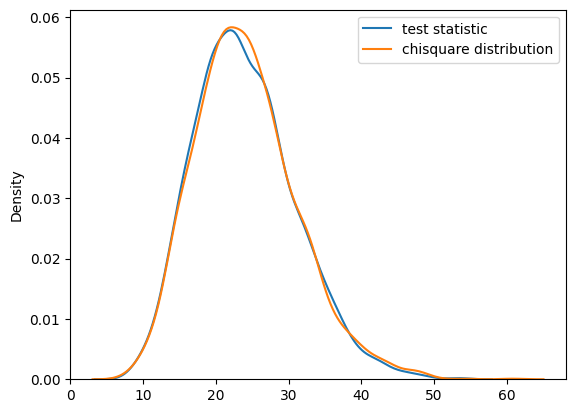

In [26]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare((p-1)*(q-1), 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisquare distribution')
plt.legend()